<h1><b><center>Regression model of Boston's housing prices </center></b></h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import norm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
# lets import the data
test = pd.read_csv(r'C:\Users\pmkos\Desktop\Programowanie\Regression\test.csv')
train = pd.read_csv(r'C:\Users\pmkos\Desktop\Programowanie\Regression\train.csv')

In [3]:
# lets have the description in place
with open(r'C:\Users\pmkos\Desktop\Programowanie\Regression\data_description.txt') as f:
    lines = f.readlines()

In [4]:
# printing the description of the columns, to have an understanding of the data
text = []
for string in lines:
    new_string = string.replace('\n','').replace('\t','')
    if new_string =='':
        pass
    else:
        text.append(new_string)
text

['MSSubClass: Identifies the type of dwelling involved in the sale.',
 '        201-STORY 1946 & NEWER ALL STYLES',
 '        301-STORY 1945 & OLDER',
 '        401-STORY W/FINISHED ATTIC ALL AGES',
 '        451-1/2 STORY - UNFINISHED ALL AGES',
 '        501-1/2 STORY FINISHED ALL AGES',
 '        602-STORY 1946 & NEWER',
 '        702-STORY 1945 & OLDER',
 '        752-1/2 STORY ALL AGES',
 '        80SPLIT OR MULTI-LEVEL',
 '        85SPLIT FOYER',
 '        90DUPLEX - ALL STYLES AND AGES',
 '       1201-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 '       1501-1/2 STORY PUD - ALL AGES',
 '       1602-STORY PUD - 1946 & NEWER',
 '       180PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 '       1902 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MSZoning: Identifies the general zoning classification of the sale.',
 '       AAgriculture',
 '       CCommercial',
 '       FVFloating Village Residential',
 '       IIndustrial',
 '       RHResidential High Density',
 '       RLResiden

In [5]:
# here are the name  of the columns to work with
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# lets drop the id column as it does not do any good
train.drop('Id', inplace=True, axis=1)
test.drop('Id', inplace=True, axis=1)

Text(0.5, 1.0, "Distribution of Boston houses' prices")

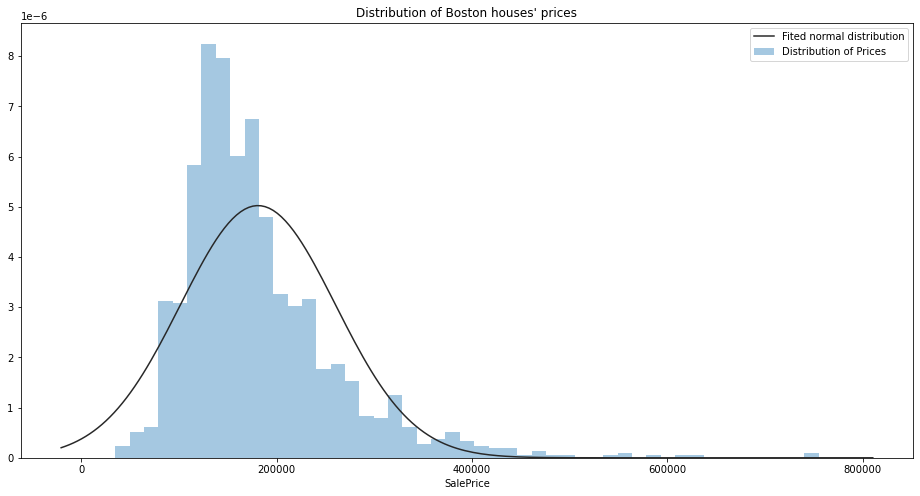

In [7]:
# lets see the distribution of SalesPrice
plt.figure(figsize=(16, 8))
sns.distplot(train['SalePrice'] , fit=norm, kde=False)
plt.legend(labels=["Fited normal distribution","Distribution of Prices"])
plt.title('Distribution of Boston houses\' prices')

In [8]:
print('We can see that the SalePrices are is skewed.')

We can see that the SalePrices are is skewed.


<Figure size 432x288 with 0 Axes>

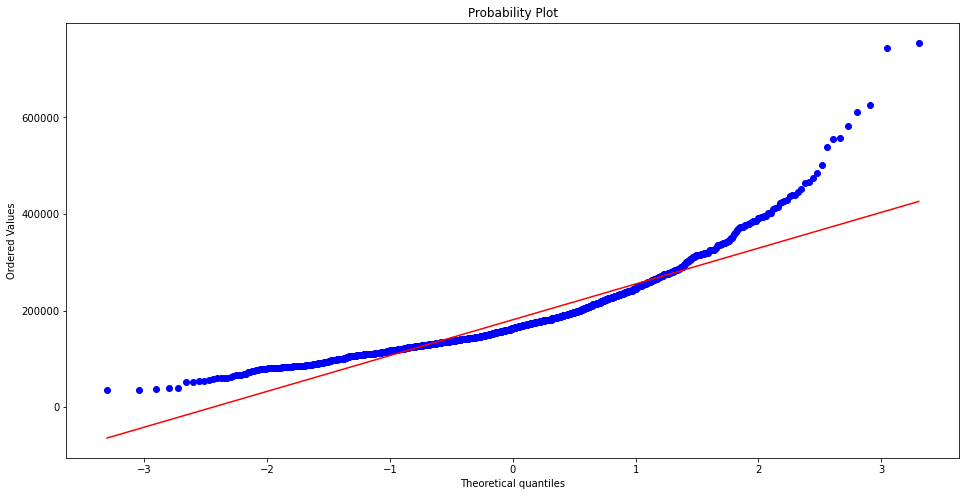

In [9]:
# lets see if the Probability plot confirms the above observation and skewness
from scipy import stats
fig = plt.figure()
plt.figure(figsize=(16, 8))
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [10]:
print('Both the above graphs show that SalePrice is not normally distributed and is skewed to the right.')
print('According to this article: https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9')
print('To get better result in our regression model we should transform the response variable to be more normally distributed.')
print('We will do it after exploratory data analysis.')

Both the above graphs show that SalePrice is not normally distributed and is skewed to the right.
According to this article: https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9
To get better result in our regression model we should transform the response variable to be more normally distributed.
We will do it after exploratory data analysis.


In [11]:
# we can see that the Price distribution is right skewed, lets find out the values of Skewness and Kurtosis
print('The skewness for the price column is: ' + str(train['SalePrice'].skew()))
print('The kurtosis for the price column is: ' + str(train['SalePrice'].kurt()))

The skewness for the price column is: 1.8828757597682129
The kurtosis for the price column is: 6.536281860064529


In [12]:
# lets explain the results
print('Positive value signifies that the tail of the histogram goes to the right.')
print('Kurtosis greater than 3 means that it has heavier tails then normal, might signify more outliers.')

Positive value signifies that the tail of the histogram goes to the right.
Kurtosis greater than 3 means that it has heavier tails then normal, might signify more outliers.


[Text(0.5, 1.0, 'Correlation heatmap')]

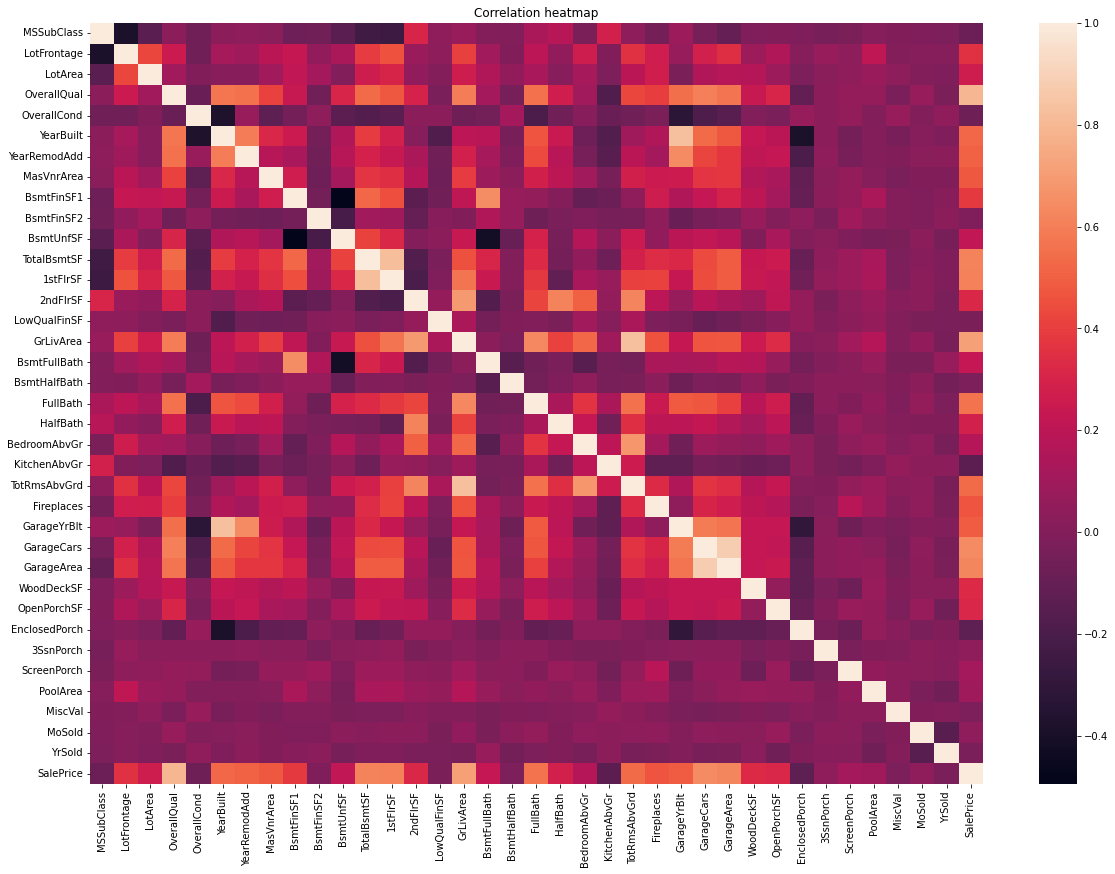

In [13]:
plt.figure(figsize=(20, 14))
sns.heatmap(train.corr()).set(title='Correlation heatmap')

In [14]:
# Lets see what are the most correlated columns with SalePrice
top10corr = train.corr()['SalePrice'].sort_values(ascending=False).head(10)
print(top10corr)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


<Figure size 1152x1008 with 0 Axes>

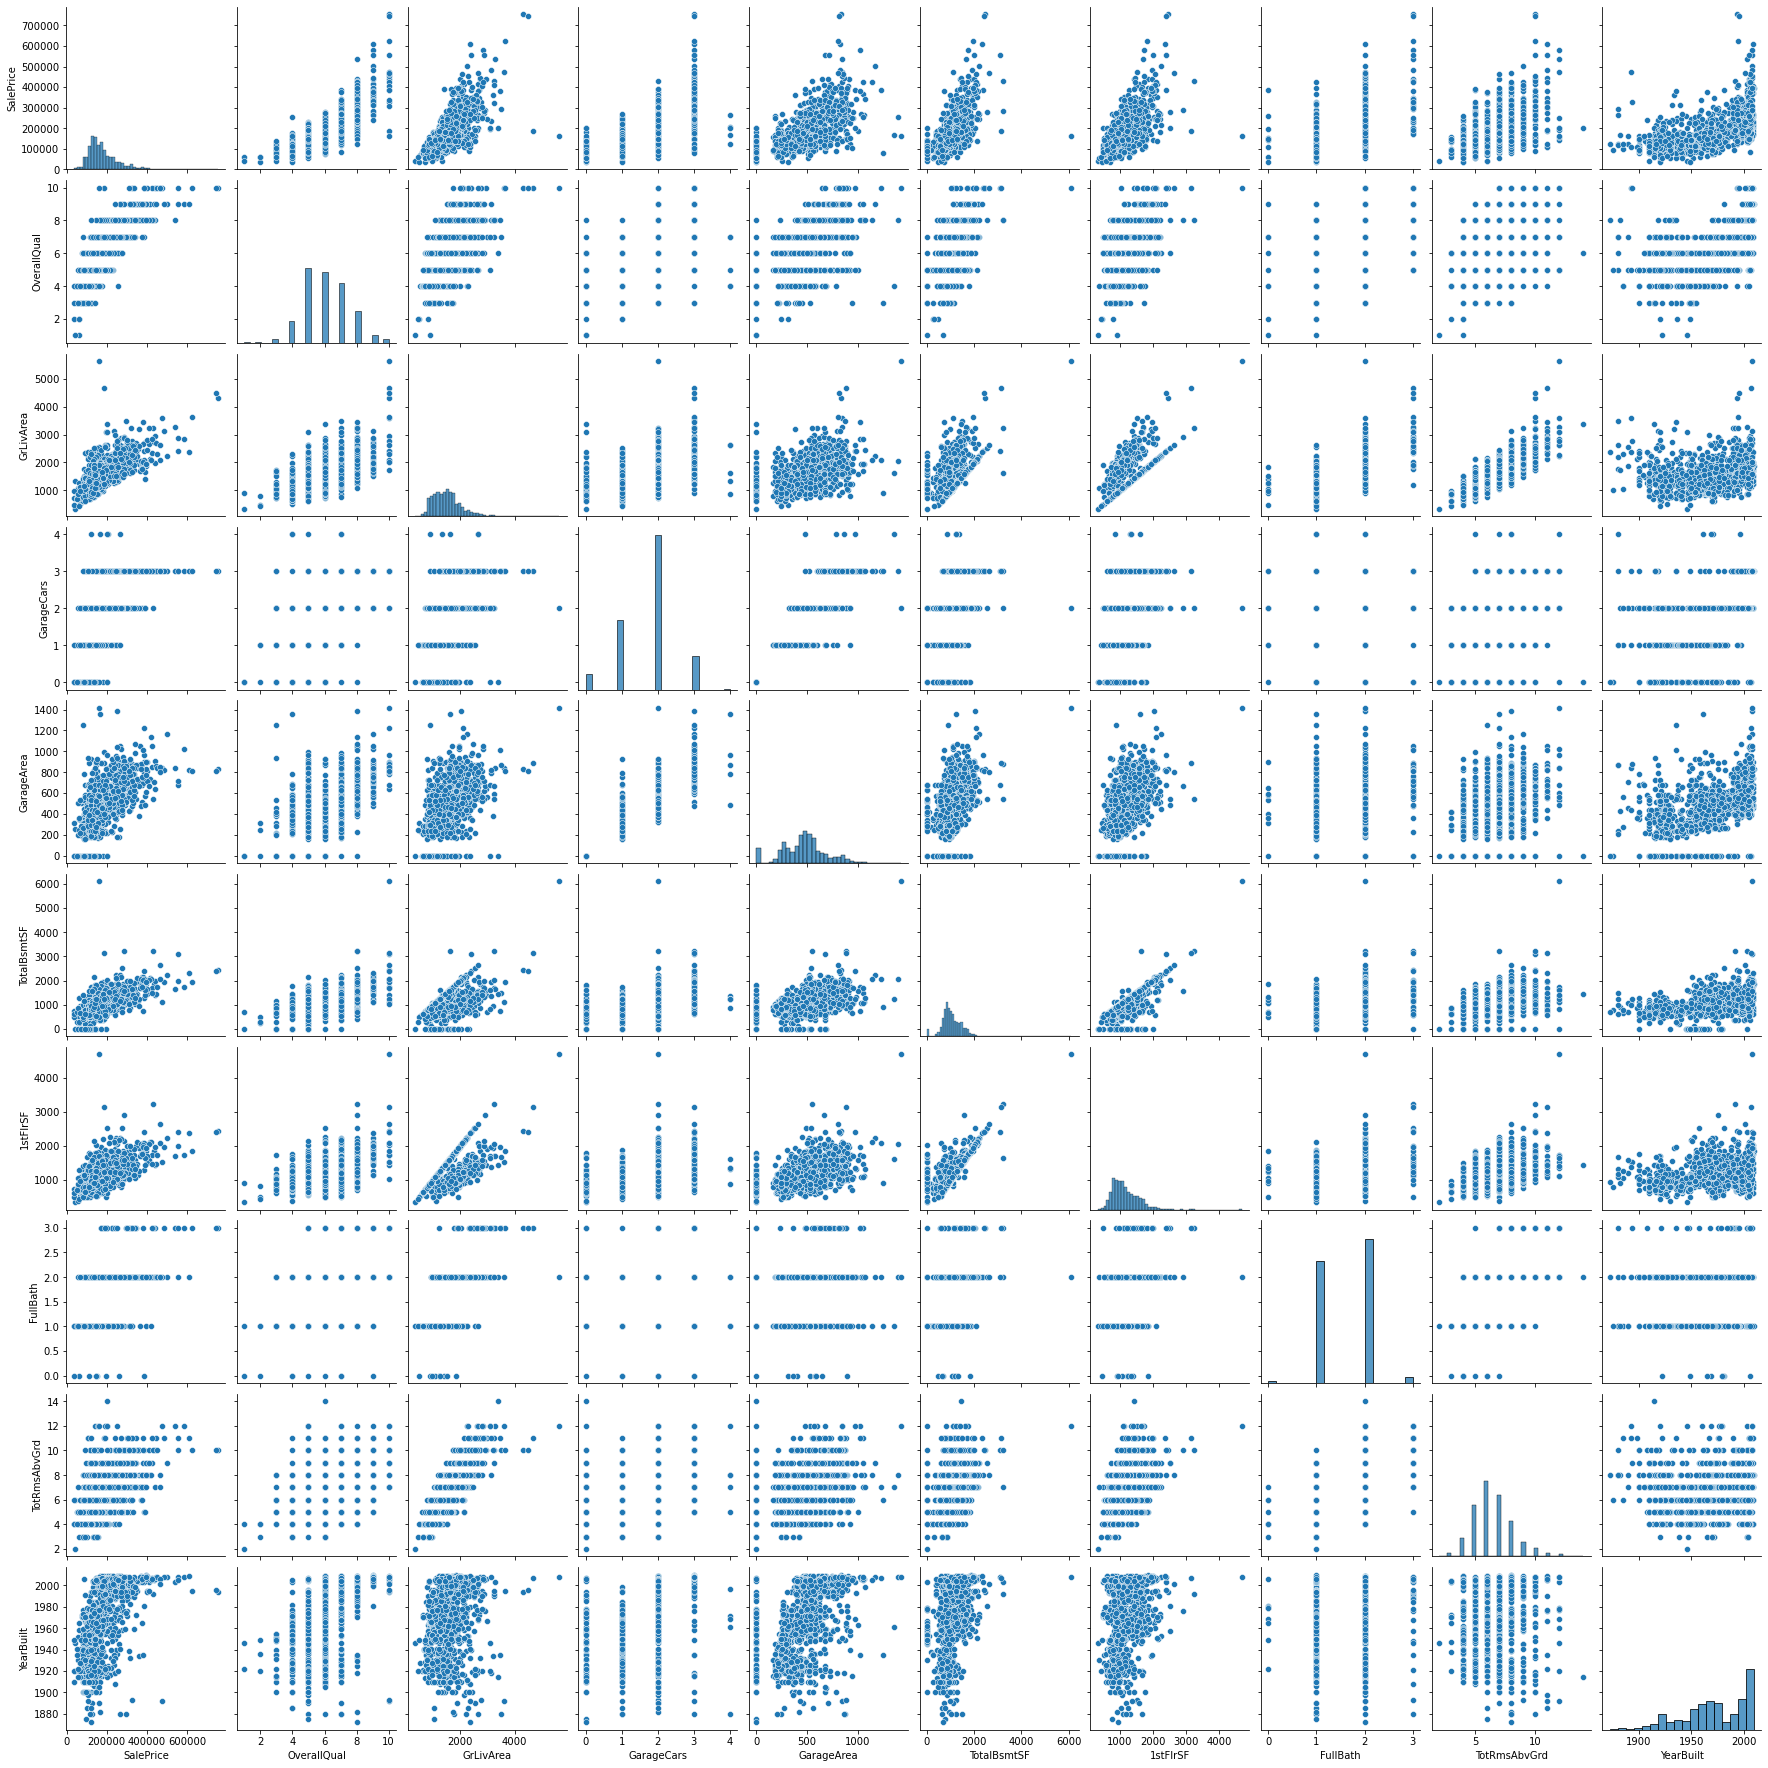

In [15]:
# lets see all those columns in action
plt.figure(figsize=(16, 14))
sns.pairplot(data=train[top10corr.index])

[Text(0.5, 1.0, 'Scatterplot: GrLivArea vs SalePrice')]

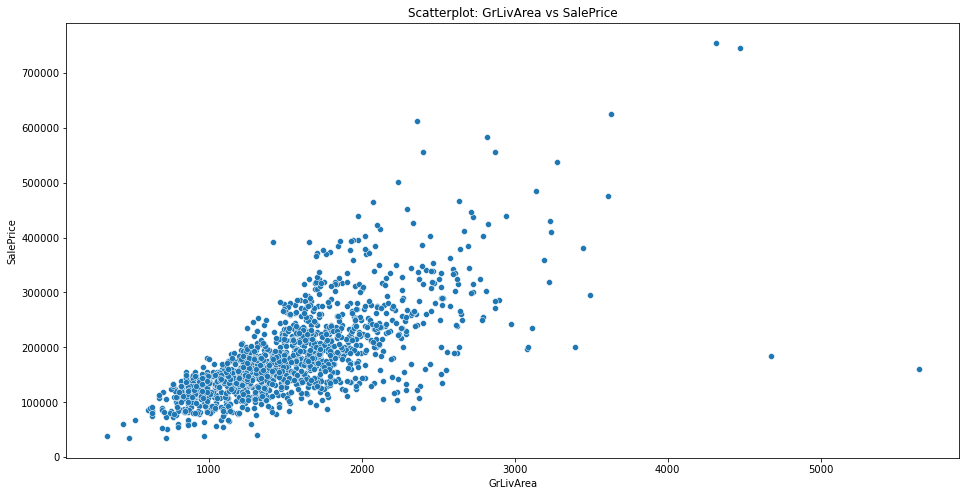

In [16]:
# lets see the relation between the SalePrice and GrLivArea
plt.figure(figsize=(16, 8))
sns.scatterplot(y=train['SalePrice'], x=train['GrLivArea']).set(title='Scatterplot: GrLivArea vs SalePrice')

In [17]:
# It seems like we have some outliers, lets explore them
train[train['GrLivArea']>4000].sort_values(by='SalePrice')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [18]:
# for sure the data with high GrivArea and low SalePrice are outliers, it's better to delete them not to disrupt our model
outliers_index = train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index

# lets drop the outliers
train.drop(outliers_index, inplace=True)

[Text(0.5, 1.0, 'Scatterplot: TotalBsmtSF vs SalePrice')]

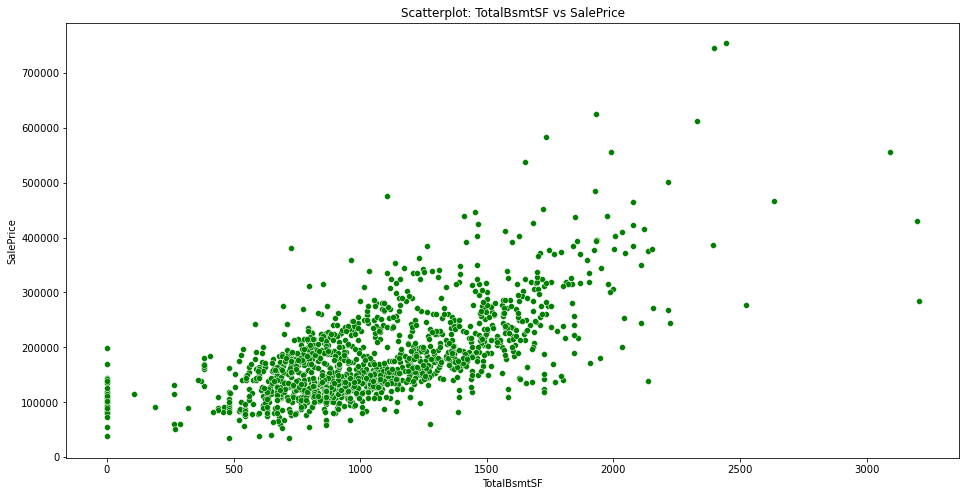

In [19]:
# lets see the relationship between SalePrice and TotalBsmtSF
plt.figure(figsize=(16, 8))
sns.scatterplot(y=train['SalePrice'], x=train['TotalBsmtSF'], color='green').set(title='Scatterplot: TotalBsmtSF vs SalePrice')

In [20]:
# lets see what TotalBsmtSF is:
for line in text:
    if 'TotalBsmtSF' in line:
        print(line)

TotalBsmtSF: Total square feet of basement area


In [21]:
# Do we have additional areas measures in the data?
for line in text:
    if 'square' in line:
        print(line)

LotArea: Lot size in square feet
MasVnrArea: Masonry veneer area in square feet
BsmtFinSF1: Type 1 finished square feet
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
GarageArea: Size of garage in square feet
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet


In [22]:
# lets explore those three paramenters
areas = train[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']]
areas.corr()

,TotalBsmtSF,1stFlrSF,2ndFlrSF
TotalBsmtSF,1.000000,0.803830,-0.206228
1stFlrSF,0.803830,1.000000,-0.230408
2ndFlrSF,-0.206228,-0.230408,1.000000


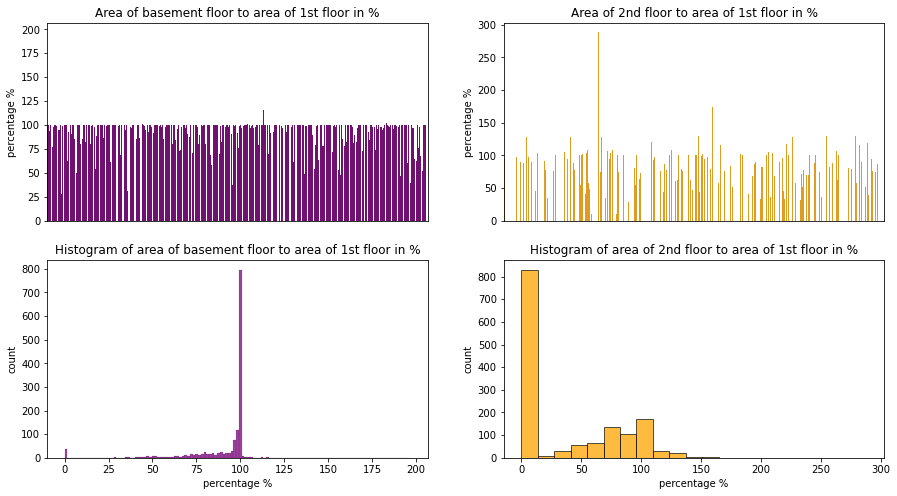

In [23]:
# Lets see the relationship between basement, first floor and second floor
basment_1stfloor_list = []
ndfloor_1stfloor_list = []

for num, row in areas.iterrows():
    try:
        basment_1stfloor_num = 100 * row['TotalBsmtSF']/row['1stFlrSF']
    except:
        basment_1stfloor_num = 0
    try:
        ndfloor_1stfloor_num = 100 * row['2ndFlrSF']/row['1stFlrSF']
    except:
        ndfloor_1stfloor_num = 0
        
    basment_1stfloor_list.append(basment_1stfloor_num)
    ndfloor_1stfloor_list.append(ndfloor_1stfloor_num)
    
fig, ax =plt.subplots(2,2)
ax1 = sns.barplot(pd.Series(basment_1stfloor_list).index, pd.Series(basment_1stfloor_list), ax=ax[0][0], color='purple')
ax2 = sns.barplot(pd.Series(ndfloor_1stfloor_list).index, pd.Series(ndfloor_1stfloor_list), ax=ax[0][1], color='orange')
ax3 = sns.histplot(basment_1stfloor_list, ax=ax[1][0], color='purple')
ax4 = sns.histplot(ndfloor_1stfloor_list, ax=ax[1][1], color='orange')
ax1.set_title('Area of basement floor to area of 1st floor in %')
ax1.set_xticks([]) 
ax2.set_xticks([]) 
ax2.set_title('Area of 2nd floor to area of 1st floor in %')
ax1.set_ylabel('percentage %')
ax2.set_ylabel('percentage %')
ax3.set_title('Histogram of area of basement floor to area of 1st floor in %')
ax4.set_title('Histogram of area of 2nd floor to area of 1st floor in %')
ax3.set_xlabel('percentage %')
ax4.set_xlabel('percentage %')
ax3.set_ylabel('count')
ax4.set_ylabel('count')
fig.set_figheight(8)
fig.set_figwidth(15)

In [24]:
# can second floor have more area than the first floor? Maybe, but more than 200%? 
# lets treat this as an outlier and remove it

outlier = train[100*train['2ndFlrSF']/train['1stFlrSF']>200].index
print(outlier)

train.drop(outlier, inplace=True)

Int64Index([362], dtype='int64')


In [25]:
# Lets see the defenitions of data related to garages
for line in text:
    if 'garage' in line:
        print(line)

       2TypesMore than one type of garage
       BuiltInBuilt-In (Garage part of house - typically has room above garage)
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
       Gar22nd Garage (if not described in garage section)
       AllocaAllocation - two linked properties with separate deeds, typically condo with a garage unit


Text(0.5, 1.0, 'Boxenplot of SalePrice vs GarageCars')

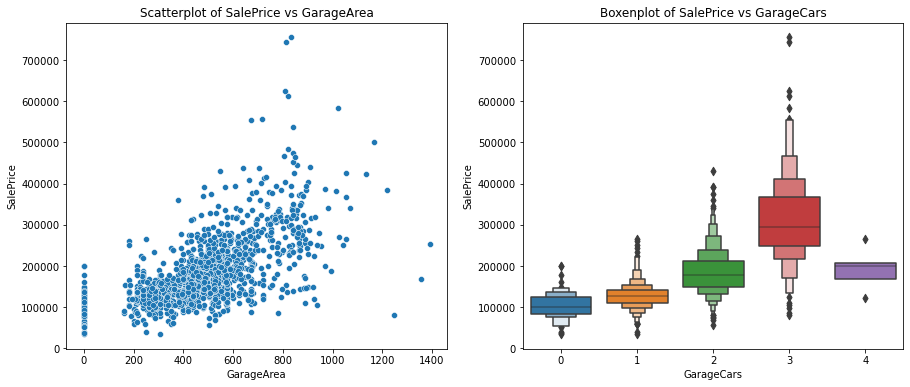

In [26]:
# GarageCars and GarageArea
fig, ax =plt.subplots(1,2, figsize=(15,6))
ax1 = sns.scatterplot(y=train['SalePrice'], x=train['GarageArea'], ax=ax[0])
ax1.set_title('Scatterplot of SalePrice vs GarageArea')
ax2 = sns.boxenplot(y=train['SalePrice'], x=train['GarageCars'], ax=ax[1])
ax2.set_title('Boxenplot of SalePrice vs GarageCars')

In [27]:
# lets find the correlation of those two features:
train[['GarageArea', 'GarageCars']].corr()

,GarageArea,GarageCars
GarageArea,1.000000,0.887402
GarageCars,0.887402,1.000000


In [28]:
print('The freatures are highly correlated, hence we can drop the GarageCars column.')

The freatures are highly correlated, hence we can drop the GarageCars column.


[Text(0.5, 1.0, 'Boxplot: OverallQual vs SalePrice')]

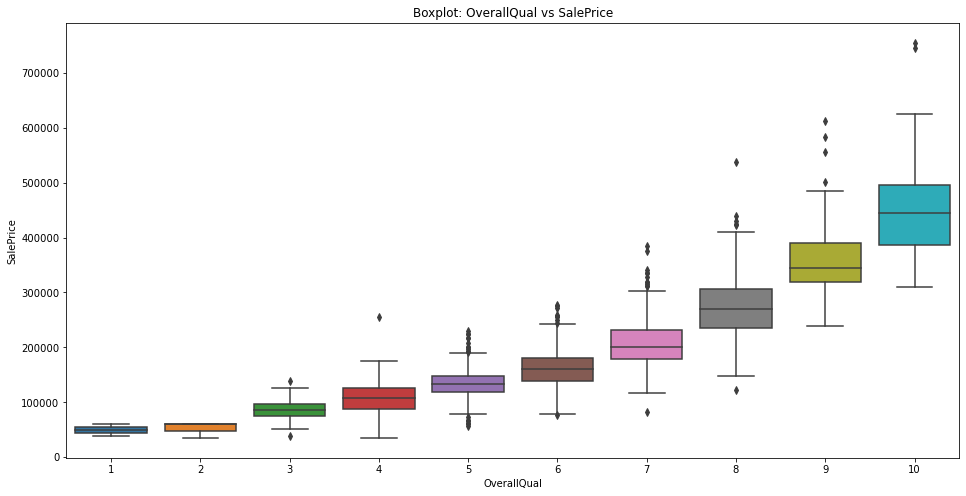

In [29]:
# Lets see the relation between OverallQual and SalePrice
plt.figure(figsize=(16, 8))
sns.boxplot(y=train['SalePrice'], x=train['OverallQual']).set(title='Boxplot: OverallQual vs SalePrice')

[Text(0.5, 1.0, 'Boxplot: YearBuild vs SalePrice')]

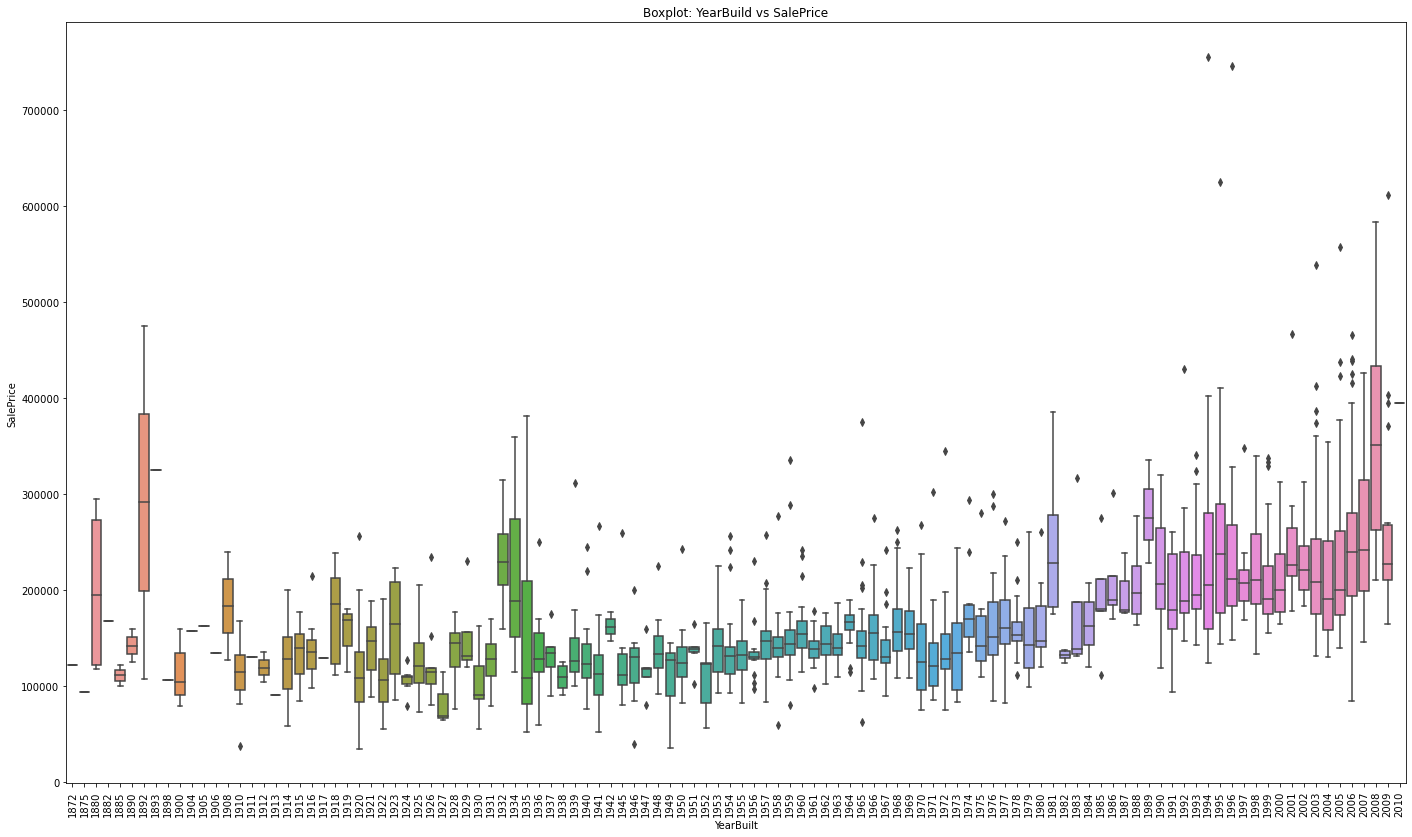

In [30]:
# relation between YearBuild and SalePrice
plt.figure(figsize=(24, 14))
plt.xticks(rotation=90)
sns.boxplot(y=train['SalePrice'], x=train['YearBuilt']).set(title='Boxplot: YearBuild vs SalePrice')

In [31]:
# We are left with two more features to evaluate: FullBath, TotRmsAbvGrd, lets start with anylizing what is their description
for line in text:
    for feature in ['TotRmsAbvGrd', 'FullBath']:
        if feature in line:
            print(line)

BsmtFullBath: Basement full bathrooms
FullBath: Full bathrooms above grade
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)


Text(0.5, 1.0, 'Boxenplot of SalePrice vs FullBath')

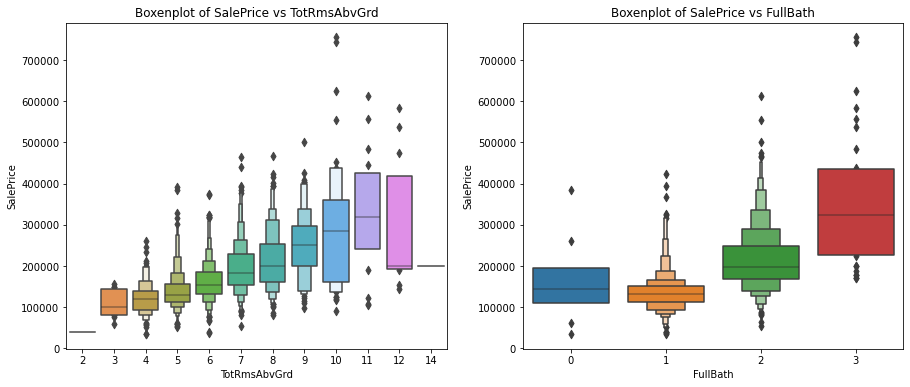

In [32]:
# since the both features relate to grade's rooms, lets graph them together:
fig, ax =plt.subplots(1,2, figsize=(15,6))
ax1 = sns.boxenplot(y=train['SalePrice'], x=train['TotRmsAbvGrd'], ax=ax[0])
ax1.set_title('Boxenplot of SalePrice vs TotRmsAbvGrd')
ax2 = sns.boxenplot(y=train['SalePrice'], x=train['FullBath'], ax=ax[1])
ax2.set_title('Boxenplot of SalePrice vs FullBath')

Text(0.5, 1.0, 'Distribution of SalePrice (Box-Cox)')

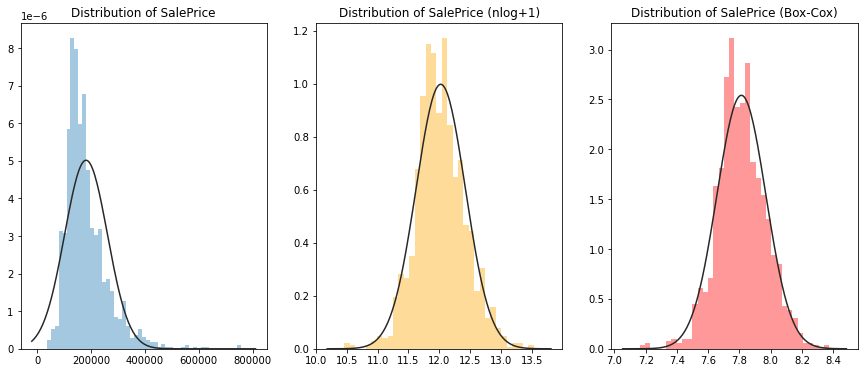

In [33]:
# Now lets transform the SalePrice to be more normaly distributed; lets try log  and box-cox transformations
import numpy as np
from scipy.stats import boxcox

log_target = np.log1p(train["SalePrice"])
bcx_target, lam = boxcox(train["SalePrice"])

fig, ax =plt.subplots(1,3, figsize=(15,6))
ax1 = sns.distplot(train['SalePrice'], fit=norm, kde=False, ax=ax[0])
ax1.set_xlabel('')
ax1.set_title('Distribution of SalePrice')
ax2 = sns.distplot(log_target, fit=norm, kde=False, ax=ax[1], color='orange')
ax2.set_xlabel('')
ax2.set_title('Distribution of SalePrice (nlog+1)')
ax3 = sns.distplot(bcx_target, fit=norm, kde=False, ax=ax[2], color='red')
ax3.set_title('Distribution of SalePrice (Box-Cox)')

<Figure size 432x288 with 0 Axes>

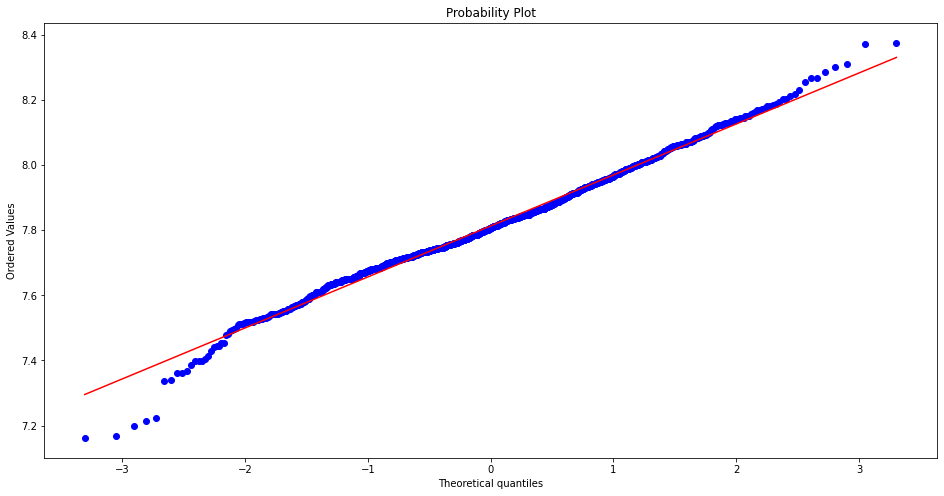

In [34]:
# lets normalize the SalesPrice with Box-Cox and see the probability plot
train["SalePrice"] = bcx_target

# and see if the prob plot changed?
fig = plt.figure()
plt.figure(figsize=(16, 8))
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [35]:
# lets join the data sets to perform data manipualtion and exclude the train prices
X_train = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [36]:
# lets see the shapes of the train and test data for further reference 
print('Shape of train is: ' + str(X_train.shape))
print('Shape of test is: ' + str(test.shape))

Shape of train is: (1457, 79)
Shape of test is: (1459, 79)


In [37]:
# lets concatenate the data and see it this worked by producing its shape:
housing = pd.concat([X_train,test])
housing.shape

(2916, 79)

[Text(0.5, 1.0, 'Missing values heatmap')]

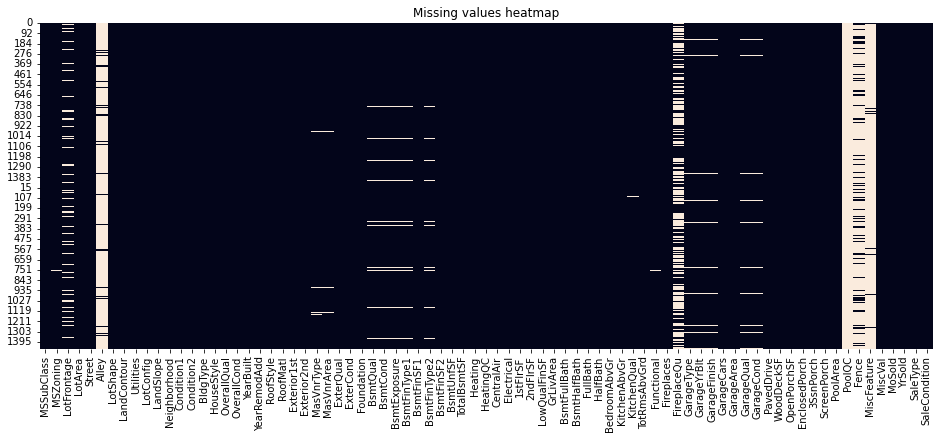

In [38]:
# lets see if there are missing values
plt.figure(figsize=(16, 6))
sns.heatmap(housing.isnull(), cbar=False).set(title='Missing values heatmap')

[Text(0.5, 1.0, 'Missing values per category in %')]

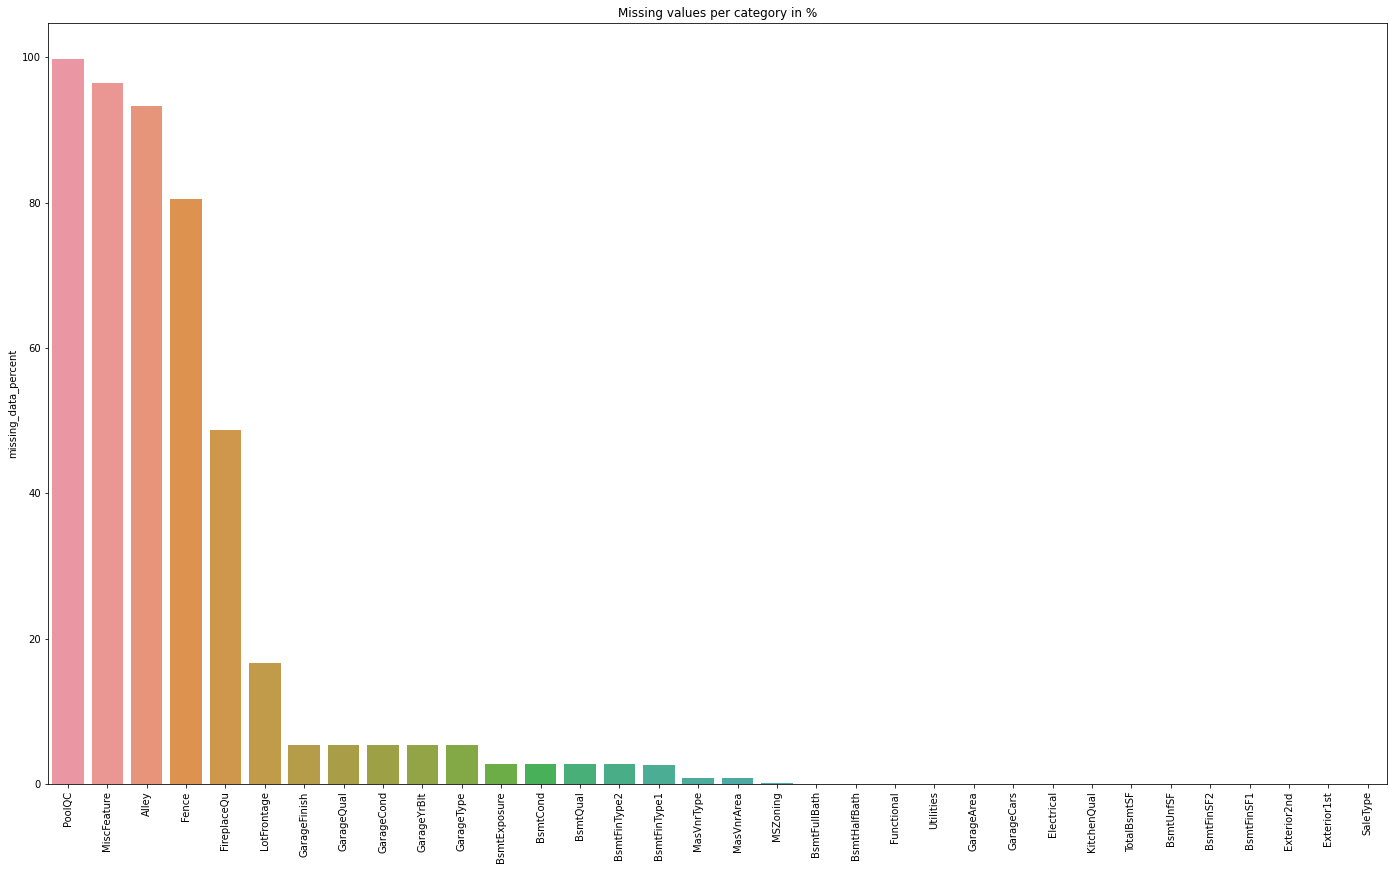

In [39]:
# lets see the missing data in the table and as %
d = housing.isna().sum()
missing_values = pd.DataFrame(d[d>0].sort_values(ascending=False), columns=['missing_data_number'])
missing_values['missing_data_percent'] = 100*missing_values['missing_data_number']/len(housing)
plt.figure(figsize=(24, 14))
plt.xticks(rotation=90)
sns.barplot(y=missing_values['missing_data_percent'], x=missing_values.index).set(title='Missing values per category in %')

In [40]:
# lets drop the columns where most of the data is missing
housing = housing.drop(labels=['Alley','PoolQC','Fence','MiscFeature'], axis=1)

<AxesSubplot:>

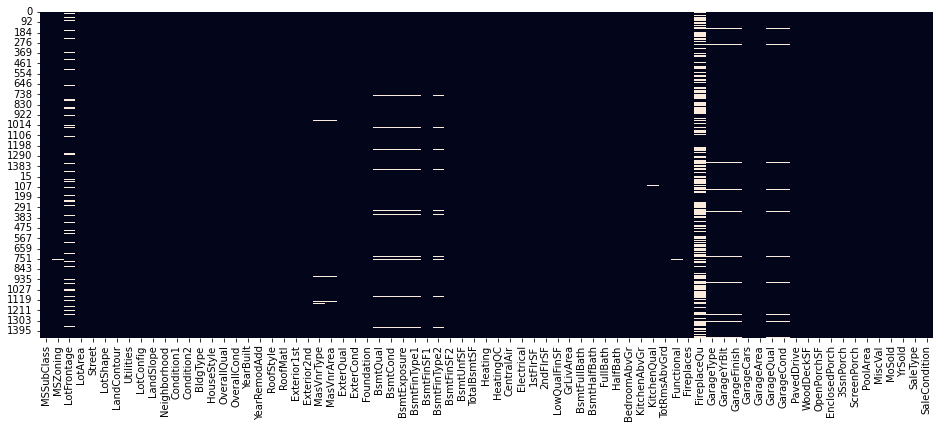

In [41]:
# time to see if this imoproved the missing data situation
plt.figure(figsize=(16, 6))
sns.heatmap(housing.isnull(), cbar=False)

In [42]:
# There is still a lot of missing value in FireplaceQu, lets check out what it is
for index, line in enumerate(text):
    if 'FireplaceQu' in line:
        print(line)

FireplaceQu: Fireplace quality


In [43]:
# Lets see this column in action:
housing[housing['FireplaceQu'].notna()]['FireplaceQu'].unique()

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [44]:
# We could look for the correlation but for the moment lets drop the column
housing = housing.drop(labels=['FireplaceQu'], axis=1)

In [45]:
# Lets see what LotFrontage is
for index, line in enumerate(text):
    if 'LotFrontage' in line:
        print(line)

LotFrontage: Linear feet of street connected to property


In [46]:
print('Ok, lets keeep it for now!')

Ok, lets keeep it for now!


<AxesSubplot:>

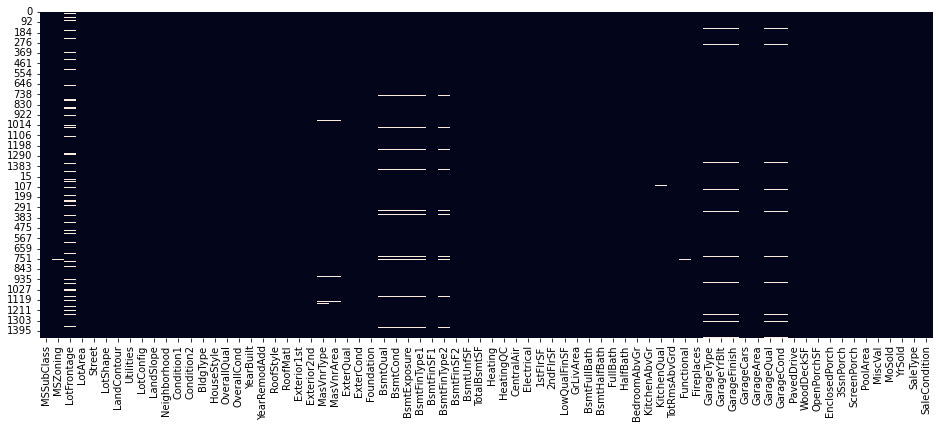

In [47]:
# How does now the situation with missing data look like?
plt.figure(figsize=(16, 6))
sns.heatmap(housing.isnull(), cbar=False)

In [48]:
# import necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [49]:
# preprocessing for numerical columns
imp_median = SimpleImputer(strategy='most_frequent')

In [50]:
# preprocessing for categorical columns
imp_constant = SimpleImputer(strategy='constant')

In [51]:
# select columns by data type
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')

In [52]:
# do the preprocessing
preprocessor = make_column_transformer(
(imp_median, num_cols),
(imp_constant, cat_cols),remainder = 'passthrough')

In [53]:
# lets create the df out of the preprocessor
housing_full = pd.DataFrame(preprocessor.fit_transform(housing), columns = housing.columns)

In [54]:
# lets see if it worked?
housing_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


<AxesSubplot:>

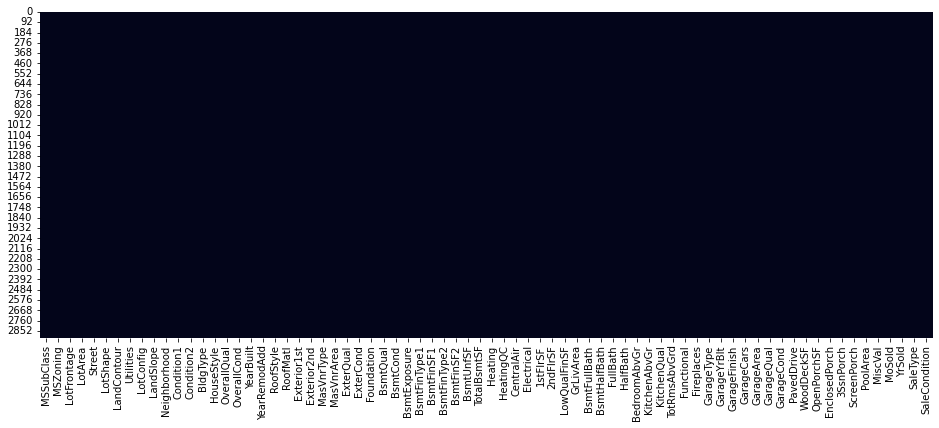

In [55]:
# Are there any missing values?
plt.figure(figsize=(16, 6))
sns.heatmap(housing_full.isnull(), cbar=False)

In [56]:
# Lets encode the values

# Numercial columns
scaler = StandardScaler()

# Categorical columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Select columns by data type
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')

# preprocessing
preprocessor = make_column_transformer((scaler, num_cols), (ohe, cat_cols))

# assigning new value
housing_full = preprocessor.fit_transform(housing_full)
housing_full = housing_full.astype(int)

In [57]:
# time for the cross validation
X = housing_full[:1457]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [58]:
# here we import, train and establish the models performance
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


models = {'LinearRegression': LinearRegression(),
          'Kernel Ridge Regression': KernelRidge(),
          'Decision Tree': DecisionTreeRegressor(),
          'Elastic Net Regression': ElasticNet(),
          'Bayesian Ridge Regression': BayesianRidge(),
          'Support Vector Regression': SVR(), 
          'Lasso Regression':Lasso(),
          'Gradient Boosting Regression': GradientBoostingRegressor(),
          'Random Forest':RandomForestRegressor(max_depth=3),
         'K Neighbors Regressor': KNeighborsRegressor()}

model_scores = {}

def models_create(models):
    for name, model in models.items():
        instanciate = model
        instanciate.fit(X_train,y_train)
        pred = model.predict(X_test)
        model_scores[name] = [round(model.score(X_test, y_test),4), 
                              round(mean_absolute_error(pred, y_test),4),
                              round(mean_squared_error(pred, y_test),4)]
    return model_scores

models_create(models)

{'LinearRegression': [0.8327, 0.0473, 0.0042],
 'Kernel Ridge Regression': [0.329, 0.0871, 0.017],
 'Decision Tree': [0.5289, 0.0741, 0.0119],
 'Elastic Net Regression': [-0.0004, 0.1204, 0.0253],
 'Bayesian Ridge Regression': [0.8418, 0.0452, 0.004],
 'Support Vector Regression': [0.7566, 0.058, 0.0061],
 'Lasso Regression': [-0.0004, 0.1204, 0.0253],
 'Gradient Boosting Regression': [0.8255, 0.0484, 0.0044],
 'Random Forest': [0.601, 0.072, 0.0101],
 'K Neighbors Regressor': [0.7272, 0.0575, 0.0069]}

In [59]:
# time to create dataframe to see the performance of the models more easily
model_compare = pd.DataFrame(model_scores).T
model_compare.rename(columns = {0:'Accuracy', 1:'MAE', 2:'MSE'}, inplace = True)
model_compare = model_compare.sort_values(by='Accuracy', ascending=False)
model_compare

,Accuracy,MAE,MSE
Bayesian Ridge Regression,0.8418,0.0452,0.0040
LinearRegression,0.8327,0.0473,0.0042
Gradient Boosting Regression,0.8255,0.0484,0.0044
Support Vector Regression,0.7566,0.0580,0.0061
K Neighbors Regressor,0.7272,0.0575,0.0069
Random Forest,0.6010,0.0720,0.0101
Decision Tree,0.5289,0.0741,0.0119
Kernel Ridge Regression,0.3290,0.0871,0.0170
Elastic Net Regression,-0.0004,0.1204,0.0253
Lasso Regression,-0.0004,0.1204,0.0253


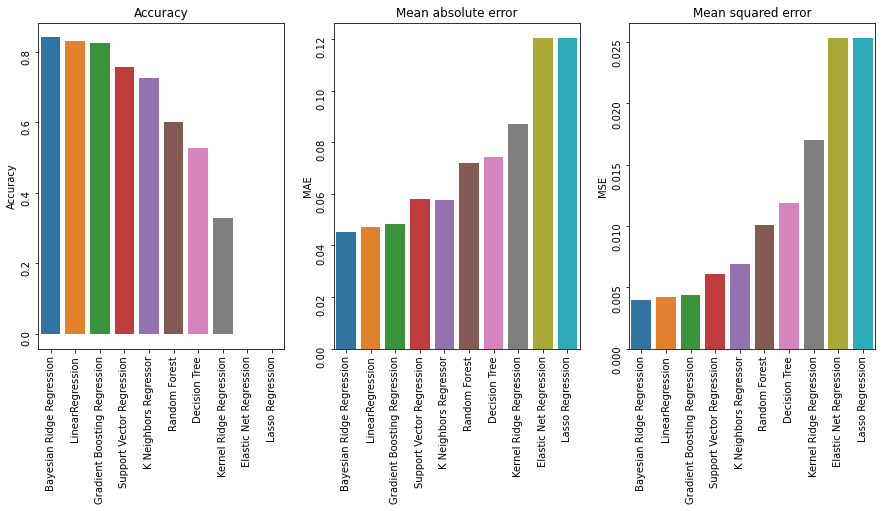

In [60]:
# lets visualize the results
fig, ax = plt.subplots(1,3, figsize=(15,6))
ax1 = sns.barplot(x=model_compare.index, y='Accuracy', data=model_compare, ax=ax[0])
ax1.set_xlabel('')
ax1.set_title('Accuracy')
ax1.tick_params(labelrotation=90)
ax2 = sns.barplot(x=model_compare.index, y='MAE', data=model_compare, ax=ax[1])
ax2.set_xlabel('')
ax2.set_title('Mean absolute error')
ax2.tick_params(labelrotation=90)
ax3 = sns.barplot(x=model_compare.index, y='MSE', data=model_compare, ax=ax[2])
ax3.set_title('Mean squared error')
ax3.tick_params(labelrotation=90)

In [61]:
# lets try to stack several models on top of each other to see if we can get better results (ensable)
from sklearn.ensemble import VotingRegressor

vr_scores = {}
br = BayesianRidge()
gbr = GradientBoostingRegressor()
svr = SVR()
vr = VotingRegressor([('br', br), ('gbr', gbr), ('svr', svr)])
vr.fit(X_train,y_train)
pred = vr.predict(X_test)
vr_scores['Voting Regressor'] = [round(vr.score(X_test, y_test),4), 
                      round(mean_absolute_error(pred, y_test),4),
                      round(mean_squared_error(pred, y_test),4)]
vr_scores

{'Voting Regressor': [0.8322, 0.0467, 0.0042]}

In [62]:
# Lets try to further improve the performance of the model by tuning the parameteres
from sklearn.model_selection import GridSearchCV
grid_scores = {}
params = {'weights':[(1,1,1),(2,1,1),(1,2,1),(1,1,2)]}
grid = GridSearchCV(vr, params)
grid.fit(X_train,y_train)

GridSearchCV(estimator=VotingRegressor(estimators=[('br', BayesianRidge()),
                                                   ('gbr',
                                                    GradientBoostingRegressor()),
                                                   ('svr', SVR())]),
             param_grid={'weights': [(1, 1, 1), (2, 1, 1), (1, 2, 1),
                                     (1, 1, 2)]})

In [63]:
# lets see the best parameters
print(grid.best_params_)

{'weights': (2, 1, 1)}


In [64]:
# lets imput the best parameters into the model and do the calculations
tvr = VotingRegressor([('br', br), ('gbr', gbr), ('svr', svr)], weights=grid.best_params_['weights'])
tvr.fit(X_train,y_train)
pred = tvr.predict(X_test)
[round(tvr.score(X_test, y_test),4), 
                      round(mean_absolute_error(pred, y_test),4),
                      round(mean_squared_error(pred, y_test),4)]

[0.8381, 0.0456, 0.0041]

In [65]:
# predictions and making submissions
from scipy.special import boxcox, inv_boxcox
predictions = tvr.predict(housing_full[1457:])
predictions = inv_boxcox(predictions, lam)
index = []

for idx, prediction in enumerate(predictions):
    index.append(1461+idx)
    
sub = pd.DataFrame()
sub['Id'] = index
sub['SalePrice'] = predictions
sub.to_csv('submission.csv',index=False)